# Introdução à Sinais e Sistemas usando Scipy.

### Scipy é uma alternativa open-source ao software Matlab que usa a linguagem Python. Para mais informações acesse o site: http://www.scipy.org/

   Essa primeira aula servirá para explicar algumas bibliotecas do Scipy, principalmente a NumPy que é utilizada para manipulação de vetores e matrizes. Além disso, abordaremos os princípios básicos de Sinais e Sistemas como as funções Impulso Unitário e Degrau, e a operção de convolução.


##Função Impulso Unitário (ou Delta de Dirac)


A função impulso unitário discreta é definida da seguinte maneira:

$$ \delta(n) =
  \begin{cases}
    1       & \quad \text{para } n=0\\
    0  & \quad \text{para } n \neq 0\\
  \end{cases}
$$


Assim nós podemos definir nossa função delta[n] em Python.

In [71]:
#define a função delta[n]
def delta(n):
    if n == 0:
        return 1
    else:
        return 0

Testando a função delta.

In [72]:
print delta(0)
print delta(1)
print delta(-1)

1
0
0


Agora precisamos definir nosso número de amostras n. Para isso usaremos a função arrange()(http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) da biblioteca NumPy.


In [73]:
import numpy as np #importa a biblioteca NumPy com o nome de np

# cria um vetor com os valores -5, -4,...,5. Obs: diferente do Matlab, 
# os vetores começam pelo índice 0, assim como no C.
n = np.arange(-5,6)

print "n = ", 
print n

n =  [-5 -4 -3 -2 -1  0  1  2  3  4  5]


Com o número de amostras definidas, agora iremos definir a sequência impulso unitário. Primeiramente, definimos um vetor vazio com o tamanho de amostras. Depois disso, aplicamos a função delta para cada amostra.

In [74]:
#importa a biblioteca NumPy com o nome np
import numpy as np

#declara um vetor com tamanho do número de amostras definidas anteriormente.
impseq = np.empty((len(n),), dtype = int)

print "impseq = ",
print impseq

#define the values of impseq
for i in range(len(n)):
    impseq[i] = delta(n[i])

print "impseq = ",  
print impseq

impseq =  [0 0 0 0 0 0 0 0 0 0 0]
impseq =  [0 0 0 0 0 1 0 0 0 0 0]


Agora podemos exibir o gráfico da sequência impulso unitário. Não se preocupe com o código para gerar o gráfico agora.


Populating the interactive namespace from numpy and matplotlib


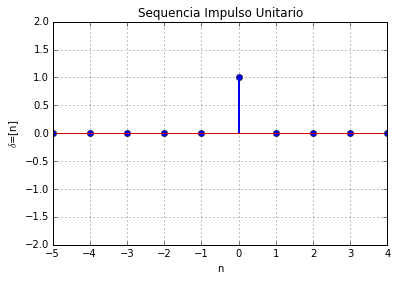

In [75]:
#esse comando faz os gráficos aparecerem direto na tela
%pylab inline

#importa biblioteca utilizada para imprimir gráficos
import pylab as pl

#exibe gráfico
pl.figure(1)
markerline, stemlines, baseline = pl.stem(n,impseq,linefmt='b')
pl.axis([-5,4,-2,2])
pl.grid()
pl.setp(stemlines, 'linewidth','2.0')
pl.xlabel('n')
pl.ylabel(r'$\delta$=[n]')
pl.title('Sequencia Impulso Unitario')

Exercícios:

1) Edite o código para criar uma sequência impulso unitário deslocado de uma amostra para direita.
2) Edite o código para criar uma sequência impulso unitário de amplitude dois.

##Função Degrau Unitário

A função degrau unitário é definida da seguinte forma: 
    $$ u(n) =
  \begin{cases}
    1       & \quad \text{para } n \ge 0\\
    0  & \quad \text{para } n <  0\\
  \end{cases}
    $$

Em Python nós temos.

u[n] = [0 0 0 0 0 1 1 1 1 1 1]


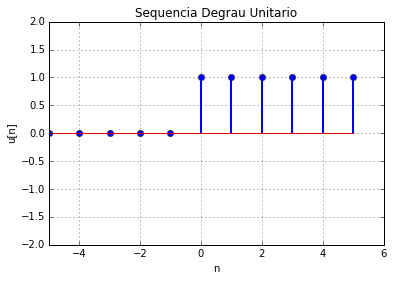

In [76]:
#define a função u[n]
def u(n):
    if n < 0:
        return 0
    return 1

#declara um vetor vazio com o tamanho do numero de amostras
stepseq = np.empty((len(n),), dtype = int)

#define os valores da sequência degrau unitário.
for i in range(len(n)):
    stepseq[i] = u(n[i])

print "u[n] =",
print stepseq

#define os valores da sequência degrau unitário
for i in range(len(n)):
    stepseq[i] = u(n[i])

#exibe o gráfico
markerline, stemlines, baseline = pl.stem(n,stepseq,linefmt='b')
pl.axis([-5,6,-2,2])
pl.grid()
pl.setp(stemlines, 'linewidth','2.0')
pl.xlabel('n')
pl.ylabel('u[n]')
pl.title('Sequencia Degrau Unitario')

##Convolução